## Analyzing Used Car Listings on eBay Kleinanzeigen

We will be working on a dataset of used cars from *eBay Kleinanzeigen*, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data).  The version of the dataset we are working with is a sample of 50,000 data points that was prepared by [Dataquest](https://www.dataquest.io) including simulating a less-cleaned version of the data.

The data dictionary provided with data is as follows:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.


The aim of this project is to clean the data and analyze the included used car listings.

# Project Introduction: Analyzing Used Car Listings on eBay Kleinanzeigen

In this project, we explore a dataset of used car listings sourced from *eBay Kleinanzeigen*, the classifieds section of the German eBay website. The dataset, originally scraped and available on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data), has been curated by [Dataquest](https://www.dataquest.io) to provide a sample of 50,000 data points. This sample includes a less-cleaned version of the data, offering a realistic representation of the challenges involved in working with raw datasets.

## Data Dictionary

- `dateCrawled`: When the ad was first crawled.
- `name`: Name of the car.
- `seller`: Indicates whether the seller is private or a dealer.
- `offerType`: Describes the type of listing.
- `price`: The listed price to sell the car.
- `abtest`: Specifies whether the listing is part of an A/B test.
- `vehicleType`: The type of vehicle.
- `yearOfRegistration`: The year the car was initially registered.
- `gearbox`: The type of transmission.
- `powerPS`: The power of the car in PS.
- `model`: The car model name.
- `kilometer`: The distance the car has been driven.
- `monthOfRegistration`: The month of the car's initial registration.
- `fuelType`: The type of fuel the car uses.
- `brand`: The brand of the car.
- `notRepairedDamage`: Indicates if the car has unrepaired damage.
- `dateCreated`: The date when the eBay listing was created.
- `nrOfPictures`: The number of pictures in the ad.
- `postalCode`: The postal code indicating the vehicle's location.
- `lastSeenOnline`: When the crawler last encountered this ad online.

## Project Objective

The primary goal of this project is to systematically clean the dataset and conduct a comprehensive analysis of the included used car listings. Through this process, we aim to derive valuable insights and trends within the data, contributing to a deeper understanding of the dynamics within the second-hand car market.


In [1]:
import pandas as pd
import numpy as np

In [2]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

## Dataset Overview

Our dataset comprises 20 columns, primarily stored as strings. Although there are a few columns with null values, none exceed approximately 20% (equivalent to 1000 rows). Additionally, some columns store date information as strings.

## Data Cleaning Approach

To enhance the dataset's usability, our initial focus will be on cleaning the column names. This step aims to streamline the data and facilitate a more straightforward analysis.


## Cleaning Columns

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We'll make a few changes here:

- Change the columns from capital to small letters.
- Change a few wordings to more accurately describe the columns.

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial Data Exploration and Cleaning

We'll start by exploring the data to find obvious areas where we can clean the data.

In [6]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


**Initial observations:**

- There are a number of text columns where all (or nearly all) of the values are the same:
    - `seller`
    - `offer_type`
- The `num_photos` column looks odd, we'll need to investigate this further.
- There are 1,421 cars listed with $0 price - given that this is only 2% of the of the cars, we might consider removing these rows.  The maximum price is one hundred million dollars, which seems a lot, let's look at the highest prices further.

In [7]:
autos["num_photos"].value_counts()

num_photos
0    50000
Name: count, dtype: int64

It looks like the `num_photos` column has `0` for every column.  We'll drop this column, plus the other two we noted as mostly one value i.e., `seller`,`offer_type`.

In [8]:
autos = autos.drop(["num_photos", "seller", "offer_type"], axis=1)

There are two columns, `price` and `odometer`, which are numeric values with extra characters being stored as text.  We'll clean and convert these.

In [9]:
autos["price"] = (autos["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [10]:
autos["odometer"] = (autos["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

## Exploring Odometer and Price

In [13]:
autos["odometer_km"].value_counts()

odometer_km
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: count, dtype: int64

The values in this field appear rounded, suggesting sellers likely selected from predetermined options. Moreover, there are more vehicles with high mileage than low mileage

In [14]:
print(autos["price"].unique().shape)

(2357,)


In [15]:
print(autos["price"].describe())

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


#### Top 20 Highest Car Prices and Their Frequency

In [16]:
autos["price"].value_counts().head(20)

price
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: count, dtype: int64

Again, the prices in this column seem rounded, however given there are 2357 unique values in the column, that may just be people's tendency to round prices on the site.

In [17]:
# highest 20 prices
autos["price"].value_counts().sort_index(ascending=False).head(20)

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: count, dtype: int64

In [18]:
# lowest 20 prices
pd.Series(autos["price"].value_counts().sort_index(ascending=True).head(20))

price
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: count, dtype: int64

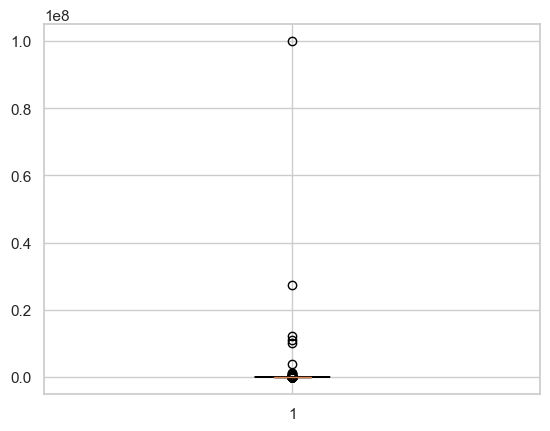

In [44]:
import matplotlib.pyplot as plt
unique_prices = pd.Series(autos["price"].unique())
# unique_prices.index
plt.boxplot(unique_prices,30)
plt.show()


#### Vehicle Listings Analysis

In our dataset, we observe a significant portion of listings priced below USD30, constituting approximately 1,500 cars. Conversely, there are a few listings with exceptionally high values, including 14 exceeding or around USD1 million.

Considering eBay's nature as an auction site, it's plausible to encounter items with an opening bid as low as USD1. While we intend to retain such items, we find it appropriate to filter out listings surpassing USD350,000. This decision arises from the observation that prices generally escalate steadily up to this point, after which they sometimes exhibit unrealistic spikes.


In [45]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

## Exploring the date columns

There are a number of columns with date information:

- `date_crawled`
- `registration_month`
- `registration_year`
- `ad_created`
- `last_seen`

These are a combination of dates that were crawled, and dates with meta-information from the crawler. The non-registration dates are stored as strings.

We'll explore each of these columns to learn more about the listings.

In [47]:
autos[['date_crawled','ad_created','last_seen']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 48565 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_crawled  48565 non-null  object
 1   ad_created    48565 non-null  object
 2   last_seen     48565 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [48]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [49]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
 * 100
        )

date_crawled
2016-03-05    2.532688
2016-03-06    1.404304
2016-03-07    3.601359
2016-03-08    3.329558
2016-03-09    3.308967
2016-03-10    3.218367
2016-03-11    3.257490
2016-03-12    3.691959
2016-03-13    1.566972
2016-03-14    3.654896
2016-03-15    3.428395
2016-03-16    2.960980
2016-03-17    3.162772
2016-03-18    1.291053
2016-03-19    3.477813
2016-03-20    3.788737
2016-03-21    3.737259
2016-03-22    3.298672
2016-03-23    3.222485
2016-03-24    2.934212
2016-03-25    3.160712
2016-03-26    3.220426
2016-03-27    3.109235
2016-03-28    3.486050
2016-03-29    3.409863
2016-03-30    3.368681
2016-03-31    3.183363
2016-04-01    3.368681
2016-04-02    3.547823
2016-04-03    3.860805
2016-04-04    3.648718
2016-04-05    1.309585
2016-04-06    0.317101
2016-04-07    0.140019
Name: proportion, dtype: float64

In [51]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_values()
         * 100
        )

date_crawled
2016-04-07    0.140019
2016-04-06    0.317101
2016-03-18    1.291053
2016-04-05    1.309585
2016-03-06    1.404304
2016-03-13    1.566972
2016-03-05    2.532688
2016-03-24    2.934212
2016-03-16    2.960980
2016-03-27    3.109235
2016-03-25    3.160712
2016-03-17    3.162772
2016-03-31    3.183363
2016-03-10    3.218367
2016-03-26    3.220426
2016-03-23    3.222485
2016-03-11    3.257490
2016-03-22    3.298672
2016-03-09    3.308967
2016-03-08    3.329558
2016-04-01    3.368681
2016-03-30    3.368681
2016-03-29    3.409863
2016-03-15    3.428395
2016-03-19    3.477813
2016-03-28    3.486050
2016-04-02    3.547823
2016-03-07    3.601359
2016-04-04    3.648718
2016-03-14    3.654896
2016-03-12    3.691959
2016-03-21    3.737259
2016-03-20    3.788737
2016-04-03    3.860805
Name: proportion, dtype: float64

Looks like the site was crawled daily over roughly a one month period in March and April 2016.  The distribution of listings crawled on each day is roughly uniform.

In [52]:
(autos["last_seen"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
         * 100
        )

last_seen
2016-03-05     0.107073
2016-03-06     0.432410
2016-03-07     0.539483
2016-03-08     0.741275
2016-03-09     0.959539
2016-03-10     1.066612
2016-03-11     1.237517
2016-03-12     2.378256
2016-03-13     0.889529
2016-03-14     1.260167
2016-03-15     1.587563
2016-03-16     1.645218
2016-03-17     2.808607
2016-03-18     0.735097
2016-03-19     1.583445
2016-03-20     2.065273
2016-03-21     2.063214
2016-03-22     2.137342
2016-03-23     1.853186
2016-03-24     1.976732
2016-03-25     1.921137
2016-03-26     1.680222
2016-03-27     1.564913
2016-03-28     2.085864
2016-03-29     2.234119
2016-03-30     2.477093
2016-03-31     2.378256
2016-04-01     2.279419
2016-04-02     2.491506
2016-04-03     2.520334
2016-04-04     2.448265
2016-04-05    12.476063
2016-04-06    22.180583
2016-04-07    13.194688
Name: proportion, dtype: float64

The crawler records the date of the last sighting for each listing, allowing us to determine when a listing was likely removed, presumably due to a sold car.

The last three days show a notably higher number of 'last seen' values, around 6-10 times larger than the previous days. This spike is more likely associated with the end of the crawling period rather than a significant increase in car sales.

In [53]:
print(autos["ad_created"].str[:10].unique().shape)
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        * 100)

(76,)


ad_created
2015-06-11    0.002059
2015-08-10    0.002059
2015-09-09    0.002059
2015-11-10    0.002059
2015-12-05    0.002059
                ...   
2016-04-03    3.885514
2016-04-04    3.685782
2016-04-05    1.181921
2016-04-06    0.325337
2016-04-07    0.125605
Name: proportion, Length: 76, dtype: float64

There is a large variety of ad created dates.  Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [55]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The year that the car was first registered will likely indicate the age of the car.  Looking at this column, we note some odd values.  The minimum value is `1000`, long before cars were invented and the maximum is `9999`, many years into the future.

## Dealing with Incorrect Registration Year Data

Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate.  Determining the earliest valid year is more difficult.  Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values.  Let's determine what percentage of our data has invalid values in this column:

In [56]:
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0]

0.038793369710697

Given that this is less than 4% of our data, we will remove these rows.

In [57]:
# Many ways to select rows in a dataframe that fall within a value range for a column.
# Using `Series.between()` is one way.
autos = autos[autos["registration_year"].between(1900,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)*100

registration_year
2000    6.760781
2005    6.289497
1999    6.205951
2004    5.790364
2003    5.781796
2006    5.719672
2001    5.646837
2002    5.325507
1998    5.062017
2007    4.877788
Name: proportion, dtype: float64

It appears that most of the vehicles were first registered in the past 20 years.

## Exploring Price by Brand

In [58]:
autos["brand"].value_counts(normalize=True)

brand
volkswagen        21.126368
bmw               11.004477
opel              10.758124
mercedes_benz      9.646323
audi               8.656627
ford               6.989996
renault            4.714980
peugeot            2.984083
fiat               2.564212
seat               1.827296
skoda              1.640925
nissan             1.527388
mazda              1.518819
smart              1.415994
citroen            1.400998
toyota             1.270324
hyundai            1.002549
sonstige_autos     0.981127
volvo              0.914719
mini               0.876159
mitsubishi         0.822604
honda              0.784045
kia                0.706926
alfa_romeo         0.664082
porsche            0.612669
suzuki             0.593389
chevrolet          0.569825
chrysler           0.351321
dacia              0.263490
daihatsu           0.250637
jeep               0.227073
subaru             0.214220
land_rover         0.209936
saab               0.164949
jaguar             0.156381
daewoo        

German manufacturers represent four out of the top five brands, almost 50% of the overall listings.  Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [59]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')


In [60]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

Of the top 5 brands, there is a distinct price gap:

- Audi, BMW and Mercedes Benz are more expensive
- Ford and Opel are less expensive
- Volkswagen is in between - this may explain its popularity, it may be a 'best of 'both worlds' option.

## Exploring Mileage

In [61]:
bmp_series = pd.Series(brand_mean_prices)
pd.DataFrame(bmp_series, columns=["mean_price"])

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [62]:
brand_mean_mileage = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

In [63]:
brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [64]:
brand_info["mean_price"] = mean_prices
brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands.  There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.

<div align="center">

## Thank You
</div>
<div align="center">
Your feedback is important to us. If you have any comments or suggestions, please let us know. Your input is greatly appreciated!
</div>


